# <font color='blue'>Set Theory</font>
<b>A set is a well-defined collection of objects.</b><br>
In <b>roster form</b>, all the elements of a set are listed, the elements are being separated
by commas and are enclosed within braces { }. For example, the set of all even
positive integers less than 7 is described in roster form as {2, 4, 6}.
<br>In <b>set-builder form</b>, all the elements of a set possess a single common property
which is not possessed by any element outside the set. For example, in the set
{a, e, i, o, u}, all the elements possess a common property, namely, each of them
is a vowel in the English alphabet, and no other letter possess this property. Denoting
this set by V, we write
V = {x : x is a vowel in English alphabet}

# <font color='blue'>Open and Closed Interval</font>

<b>Intervals as subsets of R.</b><br>
Let a, b  $\in$ **R** and a < b. Then the set of real numbers { y : a < y < b} is called an **open interval** and is denoted by (a, b). All the points between a and b belong to the open interval (a, b) but a, b themselves do not belong to this interval.
<br>The interval which contains the end points also is called **closed interval** and is denoted by [ a, b ]. 
<br>Thus [ a, b ] = {x : a $\leq$ x $\leq$ b}
<br>We can also have intervals closed at one end and open at the other, i.e.,
<br>[ a, b ) = {x : a $\leq$  x < b} is an open interval from a to b, including a but excluding b.
<br>( a b ] = { x : a < x $\leq$ b } is an open interval from a to b including b but excluding a.

# <font color='blue'>Differential calculas</font>
Calculus is the study of continuous change. It has two major subfields: differential calculus, which studies the rate of change of functions, and integral calculus, which studies the area under the curve.

## Slope of a straight line

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import sympy as sym
from sympy import sin, cos, Matrix
from sympy.abc import rho, phi
from sympy import symbols
import skimage.io as io
from math import e
from math import sin,cos,tan
# animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

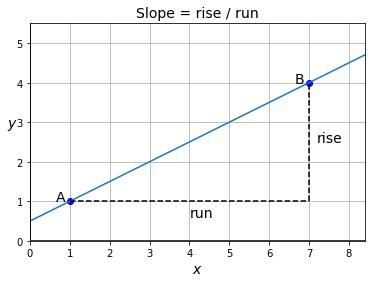

In [11]:
def get_AB_line(A_pos, B_pos, x_min=-1000, x_max=+1000):
    rise = B_pos[1] - A_pos[1]
    run = B_pos[0] - A_pos[0]
    slope = rise / run
    offset = A_pos[1] - slope * A_pos[0]
    return [x_min, x_max], [x_min * slope + offset, x_max * slope + offset]

def plot_AB_line(A_pos, B_pos, A_name="A", B_name="B"):
    for point, name in ((A_pos, A_name), (B_pos, B_name)):
        plt.plot(point[0], point[1], "bo")
        plt.text(point[0] - 0.35, point[1], name, fontsize=14)
    xs, ys = get_AB_line(A_pos, B_pos)
    plt.plot(xs, ys)

def plot_rise_over_run(A_pos, B_pos):
    plt.plot([A_pos[0], B_pos[0]], [A_pos[1], A_pos[1]], "k--")
    plt.text((A_pos[0] + B_pos[0]) / 2, A_pos[1] - 0.4, "run", fontsize=14)
    plt.plot([B_pos[0], B_pos[0]], [A_pos[1], B_pos[1]], "k--")
    plt.text(B_pos[0] + 0.2, (A_pos[1] + B_pos[1]) / 2, "rise", fontsize=14)

def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

A_pos = np.array([1, 1])
B_pos = np.array([7, 4])
plot_AB_line(A_pos, B_pos)
plot_rise_over_run(A_pos, B_pos)
show([0, 8.4, 0, 5.5], title="Slope = rise / run")

The slope of a (non-vertical) straight line can be calculated by taking any two points $\mathrm{A}$ and $\mathrm{B}$ on the line, and computing the "rise over run":

$slope = \dfrac{rise}{run} = \dfrac{\Delta y}{\Delta x} = \dfrac{y_\mathrm{B} - y_\mathrm{A}}{x_\mathrm{B} - x_\mathrm{A}}$


In this example, the rise is 3, and the run is 6, so the slope is 3/6 = 0.5.

## slope of a curve

If you want to know the slope of something else than a straight line? For example, let's consider the curve defined by $y = f(x) = x^2$:

In [12]:
def animate_AB_line(f, fp, f_str, x_A, axis=None):
    y_A = f(x_A)
    eps = 1e-4
    x_B_range = 1.5
    x_B = x_A + eps

    n_frames = 200
    text_offset_A = -0.2
    text_offset_B = +0.1
    x_min, x_max = -1000, 1000

    fig, ax = plt.subplots()

    # plot f(x)
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax.plot(xs, ys)

    # plot the tangent to the curve at point A
    if fp:
        slope = fp(x_A)
        offset = y_A - slope * x_A
        ax.plot([x_min, x_max], [slope*x_min + offset, slope*x_max + offset],
                "y--")

    # plot the line AB and the labels A and B so they can be animated
    y_A = f(x_A)
    y_B = f(x_B)
    xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
    line_inf, = ax.plot(xs, ys, "-")
    line_AB, = ax.plot([x_A, x_B], [y_A, y_B], "bo-")
    ax.text(x_A + text_offset_A, y_A, "A", fontsize=14)
    B_text = ax.text(x_B + text_offset_B, y_B, "B", fontsize=14)

    # plot the grid and axis labels
    title = r"Slope of the curve $y = {}$ at $x_\mathrm{{A}} = {}$".format(f_str, x_A)
    show(axis or [-2.1, 2.1, 0, 2.8], title=title)

    def update_graph(i):
        x_B = x_A + x_B_range * np.cos(i * 2 * np.pi / n_frames) ** 3
        if np.abs(x_B - x_A) < eps:
            x_B = x_A + eps # to avoid division by 0
        y_B = f(x_B)
        xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
        line_inf.set_data(xs, ys)
        line_AB.set_data([x_A, x_B], [y_A, y_B])
        B_text.set_position([x_B + text_offset_B, y_B])
        return line_inf, line_AB

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

animate_AB_line(lambda x: x**2, lambda x: 2*x, "x^2", -1)

As you can see, when point $\mathrm{B}$ is very close to point $\mathrm{A}$, the $(\mathrm{AB})$ line becomes almost indistinguishable from the curve itself (at least locally around point $\mathrm{A}$). The $(\mathrm{AB})$ line gets closer and closer to the **tangent** line to the curve at point $\mathrm{A}$: this is the best linear approximation of the curve at point $\mathrm{A}$.

So it makes sense to define the slope of the curve at point $\mathrm{A}$ as the slope that the $\mathrm{(AB)}$ line approaches when $\mathrm{B}$ gets infinitely close to $\mathrm{A}$. This slope is called the **derivative** of the function $f$ at $x=x_\mathrm{A}$. For example, the derivative of the function $f(x)=x^2$ at $x=x_\mathrm{A}$ is equal to $2x_\mathrm{A}$, so on the graph above, since the point $\mathrm{A}$ is located at $x_\mathrm{A}=-1$, the tangent line to the curve at that point has a slope of $-2$.

<hr />

The **derivative** of a function $f(x)$ at $x = x_\mathrm{A}$ is noted $f'(x_\mathrm{A})$, and it is defined as:

$f'(x_\mathrm{A}) = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{f(x_\mathrm{B}) - f(x_\mathrm{A})}{x_\mathrm{B} - x_\mathrm{A}}$

<hr />

Let's look at a concrete example. Let's see what the slope of the $y=x^2$ curve is, at any point $\mathrm{A}$ 

$
\begin{split}
f'(x_\mathrm{A}) \, && = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{f(x_\mathrm{B}) - f(x_\mathrm{A})}{x_\mathrm{B} - x_\mathrm{A}} \\
&& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{{x_\mathrm{B}}^2 - {x_\mathrm{A}}^2}{x_\mathrm{B} - x_\mathrm{A}} \quad && \text{since } f(x) = x^2\\
&& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim\dfrac{(x_\mathrm{B} - x_\mathrm{A})(x_\mathrm{B} + x_\mathrm{A})}{x_\mathrm{B} - x_\mathrm{A}}\quad && \text{since } {x_\mathrm{A}}^2 - {x_\mathrm{B}}^2 = (x_\mathrm{A}-x_\mathrm{B})(x_\mathrm{A}+x_\mathrm{B})\\
&& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim(x_\mathrm{B} + x_\mathrm{A})\quad && \text{since the two } (x_\mathrm{B} - x_\mathrm{A}) \text{ cancel out}\\
&& = \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim x_\mathrm{B} \, + \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim x_\mathrm{A}\quad && \text{since the limit of a sum is the sum of the limits}\\
&& = x_\mathrm{A} \, + \underset{x_\mathrm{B} \to x_\mathrm{A}}\lim x_\mathrm{A} \quad && \text{since } x_\mathrm{B}\text{ approaches } x_\mathrm{A} \\
&& = x_\mathrm{A} + x_\mathrm{A} \quad && \text{since } x_\mathrm{A} \text{ remains constant when } x_\mathrm{B}\text{ approaches } x_\mathrm{A} \\
&& = 2 x_\mathrm{A}
\end{split}
$

We just proved that the slope of $y = x^2$ at any point $\mathrm{A}$ is $f'(x_\mathrm{A}) = 2x_\mathrm{A}$. What we have done is called **differentiation**: finding the derivative of a function.

# <font color='blue'>Rules for Differentiation</font>

## Product rule: 

### <b><font color='red'>$\dfrac{𝒅}{𝒅𝒙}(𝒇+𝒈)𝒙=\dfrac{𝒅}{𝒅𝒙}𝒇(𝒙)+\dfrac{𝒅}{𝒅𝒙}𝒈(𝒙)$</font></b>
$f(x)=g(x)h(x)$

$
\begin{split}
f'(x) && = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{by definition}\\
&& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon)h(x+\epsilon) - g(x)h(x)}{\epsilon} && \quad \text{using }f(x) = g(x)h(x) \\
&& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon)h(x+\epsilon) - g(x)h(x+\epsilon) + g(x)h(x + \epsilon) - g(x)h(x)}{\epsilon} && \quad \text{subtracting and adding }g(x)h(x + \epsilon)\\
&& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon)h(x+\epsilon) - g(x)h(x+\epsilon)}{\epsilon} + \underset{\epsilon \to 0}\lim\dfrac{g(x)h(x + \epsilon) - g(x)h(x)}{\epsilon} && \quad \text{since the limit of a sum is the sum of the limits}\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}h(x+\epsilon)\right]} \,+\, \underset{\epsilon \to 0}\lim{\left[g(x)\dfrac{h(x + \epsilon) - h(x)}{\epsilon}\right]} && \quad \text{factorizing }h(x+\epsilon) \text{ and } g(x)\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}h(x+\epsilon)\right]} \,+\, g(x)\underset{\epsilon \to 0}\lim{\dfrac{h(x + \epsilon) - h(x)}{\epsilon}} && \quad \text{taking } g(x) \text{ out of the limit since it does not depend on }\epsilon\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}h(x+\epsilon)\right]} \,+\, g(x)h'(x) && \quad \text{using the definition of h'(x)}\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}\right]}\underset{\epsilon \to 0}\lim{h(x+\epsilon)} + g(x)h'(x) && \quad \text{since the limit of a product is the product of the limits}\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}\right]}h(x) + h(x)g'(x) && \quad \text{since } h(x) \text{ is continuous}\\
&& = g'(x)h(x) + g(x)h'(x) && \quad \text{using the definition of }g'(x)
\end{split}
$

Note that if $g(x)=c$ (a constant), then $g'(x)=0$, so the equation simplifies to:

$f'(x)=c \, h'(x)$

## Power rule: 
### <b><font color='red'>$\dfrac{𝒅}{𝒅𝒙} 𝒙^𝒏=𝐧 𝒙^{𝒏−𝟏}$</font></b>

$f(x)=x^r$, with $r \neq 0$

Let's define $g(x)=e^x$ and $h(x)=\ln(x^r)$. Since $a = e^{\ln(a)}$, we can rewrite $f$ as $f(x)=g(h(x))$, which allows us to use the chain rule:

$f'(x) = h'(x)g'(h(x))$

We know the derivative of the exponential: $g'(x)=e^x$. We also know the derivative of the natural logarithm: $\ln'(x)=\dfrac{1}{x}$ so $h'(x)=\dfrac{r}{x}$. Therefore:

$f'(x) = \dfrac{r}{x}\exp\left({\ln(x^r)}\right)$

Since $a = \exp(\ln(a))$, this equation simplifies to:

$f'(x) = \dfrac{r}{x} x^r$

And finally:

$f'(x) = rx^{r - 1}$

Note that the power rule works for any $r \neq 0$, including negative numbers and real numbers. For example:

* if $f(x) = \dfrac{1}{x} = x^{-1}$, then $f'(x)=-x^{-2}=-\dfrac{1}{x^2}$.
* if $f(x) = \sqrt(x) = x^{1/2}$, then $f'(x)=\dfrac{1}{2}x^{-1/2}=\dfrac{1}{2\sqrt{x}}$

## Exponential rule: 

### <b><font color='red'>$\dfrac{𝒅}{𝒅𝒙} e^x=e^x$</font></b>

$f(x)=\exp(x)=e^x$

There are several equivalent definitions of the number $e$. One of them states that $e$ is the unique positive number for which $\underset{\epsilon \to 0}\lim{\dfrac{e^\epsilon - 1}{\epsilon}}=1$. We will use this in this proof:

$
\begin{split}
f'(x) && = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{by definition}\\
&& = \underset{\epsilon \to 0}\lim\dfrac{e^{x+\epsilon} - e^x}{\epsilon} && \quad \text{using }f(x) = e^x\\
&& = \underset{\epsilon \to 0}\lim\dfrac{e^x e^\epsilon - e^x}{\epsilon} && \quad \text{using the fact that } x^{a+b}=x^a x^b\\
&& = \underset{\epsilon \to 0}\lim{\left[e^x\dfrac{e^\epsilon - 1}{\epsilon}\right]} && \quad \text{factoring out }e^x\\
&& = \underset{\epsilon \to 0}\lim{e^x} \, \underset{\epsilon \to 0}\lim{\dfrac{e^\epsilon - 1}{\epsilon}} && \quad \text{the limit of a product is the product of the limits}\\
&& = \underset{\epsilon \to 0}\lim{e^x} && \quad \text{since }\underset{\epsilon \to 0}\lim{\dfrac{e^\epsilon - 1}{\epsilon}}=1\\
&& = e^x && \quad \text{since } e^x \text{ does not depend on }\epsilon
\end{split}
$


## Question : Find the Local Minima & Maxima using the First and Second Derivatives 

### The Meaning of the First and Second Derivatives
the function f(x) <br>
its first derivative f′(x) is the slope of the tangent line at point x <br>
it tells whether the function is increasing or decreasing and how much it is increasing or decreasing <br>
if the first derivative is 0, x is called a critical point of f(x)<br><br>
its second derivative f′′(x)<br>
it tells if the first derivative is increasing or decreasing. when the second derivative is positive, the curve
f(x) is concave up, and vice versa.<br>
when the second derivative is 0 then we do not know anything new about the behaviour of 
f(x) at that point

In [86]:
x = Symbol('x')

In [87]:
x**3 - 9*x**2 + 15*x - 7

x**3 - 9*x**2 + 15*x - 7

In [88]:
y = x**3 - 9*x**2 + 15*x - 7


In [89]:
## input x range
test_x = np.linspace(-1, 7, 50)

In [90]:
## corresponding y
test_y = [y.subs({x:v}) for v in test_x]

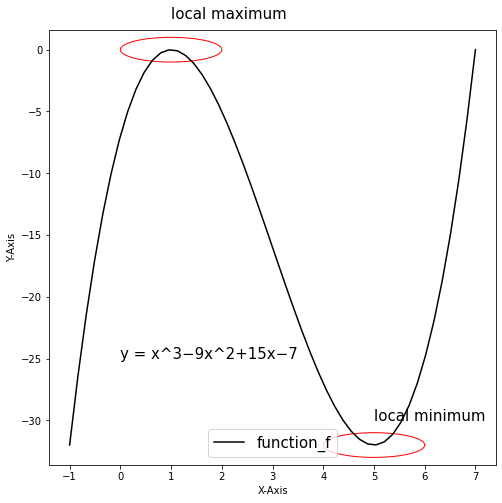

In [91]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(test_x, test_y, color='black', label='function_f')

circle1 = plt.Circle((1, 0), 1, color='red', fill=False)
circle2 = plt.Circle((5, -32), 1, color='r', fill=False)

ax.add_artist(circle1)
ax.add_artist(circle2)

plt.annotate('local maximum', xy=(1, 0), xytext=(1, 2.5), fontsize=15)
plt.annotate('local minimum', xy=(5, -32), xytext=(5, -30), fontsize=15)
plt.annotate('y = x^3−9x^2+15x−7', xy=(5, -32), xytext=(0, -25), fontsize=15)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

ax.legend(fontsize=15)
plt.show()

In [92]:
## the first derivative
yfirst = y.diff(x)
y.diff(x)

3*x**2 - 18*x + 15

In [93]:
test_y_f = [yfirst.subs({x:v}) for v in test_x]

In [94]:
eqn = Eq(y.diff(x))
print (solve(eqn))

[1, 5]


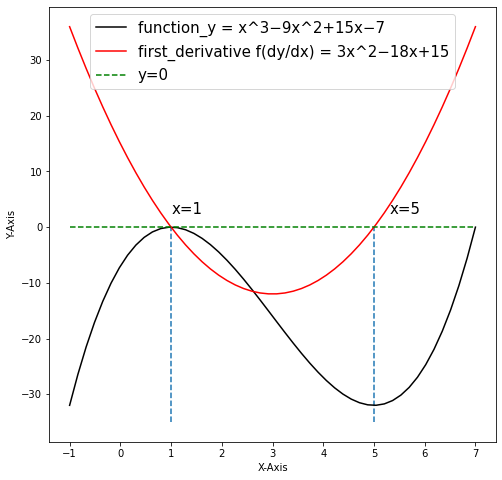

In [95]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(test_x, test_y, color='black', label='function_y = x^3−9x^2+15x−7')
ax.plot(test_x, test_y_f, color='red', label='first_derivative f(dy/dx) = 3x^2−18x+15')
ax.plot(test_x, np.zeros(len(test_x)), 'g--', label='y=0')
ax.vlines(x=1,ymin=-35,ymax=0,linestyles='--')
ax.vlines(x=5,ymin=-35,ymax=0,linestyles='--')
plt.annotate('x=1', xy=(2, 0), xytext=(1, 2.5), fontsize=15)
plt.annotate('x=5', xy=(6, 0), xytext=(5.3, 2.5), fontsize=15)
ax.legend(fontsize=15)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

In [96]:
## the second derivative
ysecond = yfirst.diff(x)
yfirst.diff(x)

6*x - 18

In [97]:
# Solve for x =1
x1=1
y1 = 6*x1-18
print(y1)

-12


In [98]:
# Solve for x =5
x2=5
y2 = 6*x2-18
print(y2)

12


In [99]:
test_y_s = [ysecond.subs({x:v}) for v in test_x]

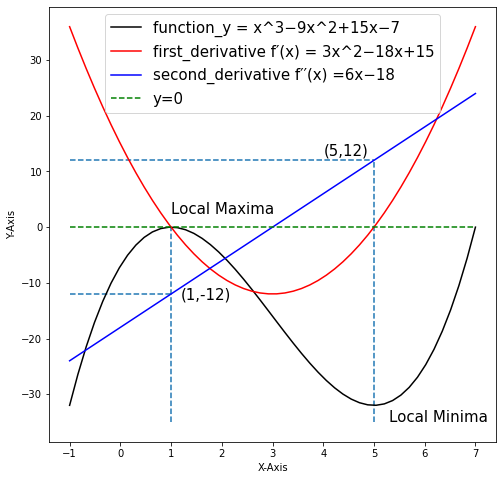

In [100]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(test_x, test_y, color='black', label='function_y = x^3−9x^2+15x−7')
ax.plot(test_x, test_y_f, color='red', label='first_derivative f′(x) = 3x^2−18x+15')
ax.plot(test_x, test_y_s, color='blue', label='second_derivative f′′(x) =6x−18')
ax.plot(test_x, np.zeros(len(test_x)), 'g--', label='y=0')

ax.vlines(x=1,ymin=-35,ymax=0,linestyles='--')
ax.vlines(x=5,ymin=-35,ymax=12,linestyles='--')
ax.hlines(y=-12,xmin=-1,xmax=1,linestyles='--')
ax.hlines(y=12,xmin=-1,xmax=5,linestyles='--')
plt.annotate('Local Maxima', xy=(2, 0), xytext=(1, 2.5), fontsize=15)
plt.annotate('Local Minima', xy=(6, 0), xytext=(5.3, -35), fontsize=15)
plt.annotate('(1,-12)', xy=(1, 0), xytext=(1.2, -13), fontsize=15)
plt.annotate('(5,12)', xy=(1, 0), xytext=(4, 13), fontsize=15)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
ax.legend(fontsize=15)
plt.show()

### Local Minima
if d² f/dx² (p) > 0 at x = p, then f(x) is CONVEX at x = p <br>
### Local Maxima
if d²f / dx² (p) < 0 at x = p, then f(x) is CONCAVE at x = p <br>
### Saddle Point
if d²f/dx² (p) = 0 at x = p, then further investagation need to be done to determine if its a saddle point



### Business Applications

An apartment complex has 250 apartments to rent. If they rent x  apartments then their monthly profit, in dollars, is given by,

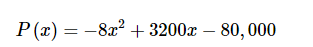

In [101]:
p = - 8*x**2 + 3200*x - 80000
- 8*x**2 + 3200*x - 80000

-8*x**2 + 3200*x - 80000

find derivative and the critical point(s) that fall in the range

In [102]:
# the first derivative
pfirst = p.diff(x)
p.diff(x)

3200 - 16*x

In [103]:
eqn = Eq(y.diff(x))
print (solve(eqn))

[1, 5]


Since the profit function is continuous and we have an interval with finite bounds we can find the maximum value by simply plugging in the only critical point that we have (which nicely enough in the range of acceptable answers) and the end points of the range.

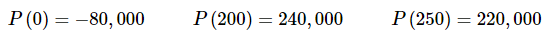

So, it looks like they will generate the most profit if they only rent out 200 of the apartments instead of all 250 of them.

QUESTION: What is Chain rule and Partial Derivatives.

# Chain Rule

It deals with nested functions, for example, f(g(x)) and states that the derivative is calculated as the derivative of an outer function multiplied with the inner function, then all multiplied by the derivative of the inner function.

F(x) =  f(g(x))  >>  F'(x)  =  f'(g(x))  *  g'(x)

In [104]:
x,y,u,z = symbols("x, y,u,z")

In [105]:
(x**2-3*x+5)**3

(x**2 - 3*x + 5)**3

In [106]:
sym.diff((x**2-3*x+5)**3)

(6*x - 9)*(x**2 - 3*x + 5)**2

In [107]:
(x**2+1)**3

(x**2 + 1)**3

In [108]:
sym.diff((x**2+1)**3)

6*x*(x**2 + 1)**2

In [109]:
sym.sin(x)**2

sin(x)**2

In [110]:
f = sym.sin(x)**2

First differentiate d/dsinx (sinx)<sup>2</sup> w.r.t sinx i.e. 2sinx

Next Differentiate d/dx sinx w.r.t x i.e. cosx

d/dsinx (sinx)<sup>2</sup> * d/dx sinx = d/dx (sinx)<sup>2</sup>

= 2cosxsinx

In [111]:
sym.diff(f)

2*sin(x)*cos(x)

The chain rule is used as the main tool to solve the following classes for problems:


1.Implicit Differentiation: The chain rule can be used to compute derivatives of implicit functions

                     F(x,y(x)) = 0
                     
where F is a function of two variables x and y


2.Logarithmic Differentiation: By first taking the logarithm of both sides, we can compute derivatives of
                   y(x) = f(x)<sup>g(x)</sup>
                   
 
3.Inverse Functions Differentiation: The chain rule is used to derive the derivative of the inverse function formula.



4.Related Rates: There are word problems where both y and x depend on some related variable t.The goal is to compute the rate of   change of y(x) with respect to t.

# Univariable and Multivariable calculus

Univariate calculus deals with single variables in a function

f(x) = x<sup>2</sup>+2x+1

Multivariate calculus deals with two or more variables in a function

f(x,y) = 2x-y+1

# Partial Derivatives

Here, the same rules apply as when dealing with simple single variable you still use the chain rule, power rule, etc, but you take derivatives with respect to one variable while keeping others constant.

 f(x, y) = x<sup>3</sup>+ 2x<sup>2</sup>y + y<sup>2</sup>+ 2x + 1

In [112]:
f = x**3+(2*x**2)*y+y**2+2*x+1

In [113]:
sym.diff(f,x)

3*x**2 + 4*x*y + 2

In [114]:
sym.diff(f,y)

2*x**2 + 2*y

g(x,y,z) = x<sup>2</sup>yz<sup>5</sup>

In [115]:
g = x**2 * y * z**5

In [116]:
sym.diff(g,x)

2*x*y*z**5

In [117]:
sym.diff(g,y)

x**2*z**5

In [118]:
sym.diff(g,z)

5*x**2*y*z**4

# Partial differential equation

Partial differential equations are used to mathematically formulate, and thus aid the solution of, physical and other problems involving functions of several variables, such as the propagation of heat or sound, fluid flow, elasticity, electrostatics, electrodynamics, etc.

### Jacobian Matrix

### In vector calculus, the Jacobian matrix of a vector-valued function of several variables is the matrix of all its first-order partial derivatives. 

Or simply Jacobian matrix is a matrix of partial derivatives.  

At each point where a function is differentiable, its Jacobian matrix can also be thought of as describing the amount of "stretching", "rotating" or "transforming" that the function imposes locally near that point. For example, if (x′, y′) = f(x, y) is used to smoothly transform an image, the Jacobian matrix Jf(x, y), describes how the image in the neighborhood of (x, y) is transformed.

In [124]:
import sympy as sym
from sympy import sin, cos, Matrix
from sympy.abc import rho, phi
from sympy import symbols
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'At(-2,1) post transformation - Zoomed')

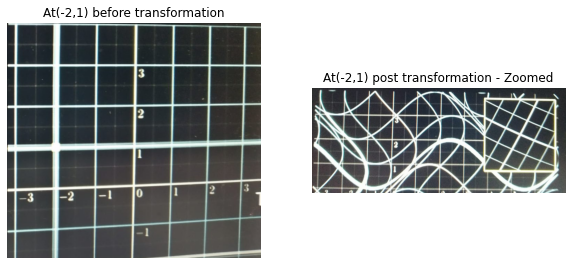

In [127]:
img1 = io.imread('Jac_minus2_one.jpeg')
img2 = io.imread('Jac_minus2_one_zoomed.jpeg')
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("At(-2,1) before transformation")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("At(-2,1) post transformation - Zoomed")


### How Jacobian Matrix is derived

\begin{bmatrix}
\frac{\partial u_1}{\partial x_1} & \frac{\partial u_1}{\partial x_2}  \\
    \frac{\partial u_2}{\partial x_1} & \frac{\partial u_2}{\partial x_2} 
\end{bmatrix}

In [128]:
def f(a,b):
    return Matrix([[a+sin(b)],[b+sin(a)]])

                  
x,y=symbols("x,y")


X=f(x,y)
Y=Matrix([x,y])
print(X)
print(Y)

X.jacobian(Y)


Matrix([[x + sin(y)], [y + sin(x)]])
Matrix([[x], [y]])


Matrix([
[     1, cos(y)],
[cos(x),      1]])

#### Example - Polar-Cartesian transformation

In [129]:
X = Matrix([rho*cos(phi), rho*sin(phi)])
print(X)
Y = Matrix([rho, phi])
print(Y)
X.jacobian(Y)

Matrix([[rho*cos(phi)], [rho*sin(phi)]])
Matrix([[rho], [phi]])


Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)]])

### Application of Jacobian


#### In our physical world many things can be represented as a vector field y⃗ =f(x⃗ ), such as gravity, electric fields, magnetic fields, etc. The Jacobian matrix of such a field is just how the field changes with the input (position, time, etc.), to the first order. 

One prime example is in the field of control engineering, where the use of Jacobian matrices allows the local (approximate) linearization of non-linear systems around a given equilibrium point, thus allowing the use of linear systems techniques, such as the calculation of eigenvalues (and thus allowing an indication of the type of the equilibrium point).


The analysis of the |J| permits one to characterize the behavior of the function around a given point, which has uses in the social sciences.

|J| is used to test functional dependence, linear and nonlinear, of a set of equations.

If |J| = 0, the equations are functionally dependent.

If |J| > 0, the equations are functionally independent.

|J| does not determine the functional relationship, linear or nonlinear.

If |J| at a given point is different from zero, the function is invertible near that point, that is, an inverse function exists.

In [130]:
def j(a,b):
    return a.jacobian(b)

x1,y1,x2,y2 =symbols("x1,y1,x2,y2")


X1=Matrix([[2*x1*y1],[4*x1*y1]])
Y1=Matrix([x1,y1])
JX1=j(X1,Y1)


if JX1.det() > 0 :
    print(f'{X1} has equations which are lineraly independent')
elif JX1.det() == 0:
    print(f'{X1} has equations which are lineraly dependent')
JX1

Matrix([[2*x1*y1], [4*x1*y1]]) has equations which are lineraly dependent


Matrix([
[2*y1, 2*x1],
[4*y1, 4*x1]])

In [131]:
X2=Matrix([[2*x2*y2],[2*x2+4*y2]])
Y2=Matrix([x2,y2])
JX2=j(X2,Y2)

JX2 

Matrix([
[2*y2, 2*x2],
[   2,    4]])

In [132]:
JX2.det() 

-4*x2 + 8*y2

#### Above Matrix is linearly independent at any point other than (0,0)

In [133]:
 JX2.inv()

Matrix([
[-8/(8*x2 - 16*y2), 4*x2/(8*x2 - 16*y2)],
[  2/(4*x2 - 8*y2),   -y2/(2*x2 - 4*y2)]])

#### This Function is not invertible at points(0,0) , (2,1) and any multiples thereof

### QUESTION 1: What is Hessian Matrix and show an example of a hessian matrix for an equation with 2 variables.

# HESSIAN MATRIX

For a function f, where $f \in ℝ$<sup>2</sup>, the Hessian Matrix would be of the following form:
MatrixForm 
Hf = {
        {fxx, fxy}, 
        {fyx, fyy}
     }
is a Hessian matrix. 

Hessian matrix of an n variable real-valued function z=f(x1,x2,...,xn)=f(x) (where x=(x1,x2,...,xn)) whose second partial derivatives exist is the defined as the following n×n matrix of second partial derivatives:

\begin{bmatrix}{\dfrac {\partial ^{2}f}{\partial x_{1}^{2}}}&{\dfrac {\partial ^{2}f}{\partial x_{1}\,\partial x_{2}}}&\cdots &{\dfrac {\partial ^{2}f}{\partial x_{1}\,\partial x_{n}}}\\[2.2ex]{\dfrac {\partial ^{2}f}{\partial x_{2}\,\partial x_{1}}}&{\dfrac {\partial ^{2}f}{\partial x_{2}^{2}}}&\cdots &{\dfrac {\partial ^{2}f}{\partial x_{2}\,\partial x_{n}}}\\[2.2ex]\vdots &\vdots &\ddots &\vdots \\[2.2ex]{\dfrac {\partial ^{2}f}{\partial x_{n}\,\partial x_{1}}}&{\dfrac {\partial ^{2}f}{\partial x_{n}\,\partial x_{2}}}&\cdots &{\dfrac {\partial ^{2}f}{\partial x_{n}^{2}}}\end{bmatrix}

In [134]:
from sympy import symbols

In [135]:
x,y = symbols("x, y")
# Consider the equation f(x,y)
f_x_y = E**(x/2)*sin(y)
f_x_y

exp(x/2)*sin(y)

In [136]:
# 1st derivative for x
df_dx = diff(f_x_y,x)
df_dx

exp(x/2)*sin(y)/2

In [137]:
# 1st derivative for y
df_dy = diff(f_x_y,y)
df_dy

exp(x/2)*cos(y)

In [138]:
# 2nd derivative of df_dx for x
d2f_dx2 = diff(df_dx, x)
d2f_dx2

exp(x/2)*sin(y)/4

In [139]:
# 2nd derivative of df_dx for y
d2f_dydx = diff(df_dx, y)
d2f_dydx

exp(x/2)*cos(y)/2

In [140]:
# 2nd derivative of df_dy for x
d2f_dxdy = diff(df_dy, x)
d2f_dxdy

exp(x/2)*cos(y)/2

In [141]:
# 2nd derivative of df_dy for y
d2f_dy2 = diff(df_dy, y)
d2f_dy2

-exp(x/2)*sin(y)

In [142]:
# Hessian Matrix
hessian_matrix = Matrix([[d2f_dx2, d2f_dxdy],[d2f_dydx, d2f_dy2]])
hessian_matrix

Matrix([
[exp(x/2)*sin(y)/4, exp(x/2)*cos(y)/2],
[exp(x/2)*cos(y)/2,  -exp(x/2)*sin(y)]])

## Demonstrate a Business Application of Hessian Matrix.

Hessian Matrix is primalriy used in determining if the critical point of a function is local Maxima, Minima or Saddle point. Once you find a point where the gradient of a multivariable function is the zero vector, meaning the tangent plane of the graph is flat at this point, the second partial derivative test is a way to tell if that point is a local maximum, local minimum, or a saddle point.
The key term DETERMINANT of the second partial derivative test is this:

![D(x,y)=\det(H(x,y))=f_{xx}(x,y)f_{yy}(x,y)-\left(f_{xy}(x,y)\right)^{2}](https://wikimedia.org/api/rest_v1/media/math/render/svg/22e0792aadbe28104486e2108bf12cdde60d063f),
of H. Finally, suppose that (*a*, *b*) is a critical point of f (that is, *f*~*x*~(*a*, *b*) = *f*~*y*~(*a*, *b*) = 0). Then the second partial derivative test asserts the following:

1.  If *D*(*a*, *b*) > 0 and *f~xx~*(*a*, *b*) > 0 then (*a*, *b*) is a local minimum of f.
2.  If *D*(*a*, *b*) > 0 and *f~xx~*(*a*, *b*) < 0 then (*a*, *b*) is a local maximum of f.
3.  If *D*(*a*, *b*) < 0 then (*a*, *b*) is a [saddle point](https://en.wikipedia.org/wiki/Saddle_point "Saddle point") of f.
4.  If *D*(*a*, *b*) = 0 then the second derivative test is inconclusive, and the point (*a*, *b*) could be any of a minimum, maximum or saddle point.

For equations having higher number of variables, we use eigenvalues of the Hessian matrix to determine the maxima, minima or saddle point.

Let's consider a function f(x,y) and determine it's maxima, minima and saddle points.

In [143]:
x,y = symbols("x, y")
f_x_y=x**4-32*x**2+y**4-18*y**2
f_x_y

x**4 - 32*x**2 + y**4 - 18*y**2

In [144]:
# 1st derivative for x
df_dx = diff(f_x_y,x)
df_dx

4*x**3 - 64*x

In [145]:
# 1st derivative for y
df_dy = diff(f_x_y,y)
df_dy

4*y**3 - 36*y

In [146]:
from sympy import Eq, solve

# Finding critical points by equating df_dx=0 and df_dy=0 and solving the equations
eq_dfdx = Eq(df_dx,0)
eq_dfdx

Eq(4*x**3 - 64*x, 0)

In [147]:
eq_dfdy = Eq(df_dy,0)
eq_dfdy

Eq(4*y**3 - 36*y, 0)

In [148]:
critical_point = solve((eq_dfdx, eq_dfdy),(x,y))
critical_point

[(-4, -3), (-4, 0), (-4, 3), (0, -3), (0, 0), (0, 3), (4, -3), (4, 0), (4, 3)]

In [149]:
print(f"The critical point of ({f_x_y}) is {critical_point}")

The critical point of (x**4 - 32*x**2 + y**4 - 18*y**2) is [(-4, -3), (-4, 0), (-4, 3), (0, -3), (0, 0), (0, 3), (4, -3), (4, 0), (4, 3)]


In [150]:
# Getting the Hessian matrix for the equation:
# 2nd derivative of df_dx for x
d2f_dx2 = diff(df_dx, x)
d2f_dx2

12*x**2 - 64

In [151]:
# 2nd derivative of df_dx for y
d2f_dydx = diff(df_dx, y)
d2f_dydx

0

In [152]:
# 2nd derivative of df_dy for x
d2f_dxdy = diff(df_dy, x)
d2f_dxdy

0

In [153]:
# 2nd derivative of df_dy for y
d2f_dy2 = diff(df_dy, y)
d2f_dy2

12*y**2 - 36

In [154]:
# Hessian Matrix
hessian_matrix = Matrix([[d2f_dx2, d2f_dxdy],[d2f_dydx, d2f_dy2]])
hessian_matrix

Matrix([
[12*x**2 - 64,            0],
[           0, 12*y**2 - 36]])

In [155]:
# The hessian matrix consists of even functions, so we can take the positive values:
# Critical values to be considered: [(0, 0), (0, 3), (4, 0), (4, 3)]

hessian_matrix_0_0 = Matrix([[d2f_dx2.subs([(x,0),(y,0)]), d2f_dxdy.subs([(x,0),(y,0)])],[d2f_dydx.subs([(x,0),(y,0)]), d2f_dy2.subs([(x,0),(y,0)])]])
hessian_matrix_0_0

Matrix([
[-64,   0],
[  0, -36]])

### D(hessian_matrix_0_0) > 0 , d2f_dx2.subs([(x,0),(y,0)]) < 0 , making it a local maximum

In [156]:
hessian_matrix_0_3 = Matrix([[d2f_dx2.subs([(x,0),(y,3)]), d2f_dxdy.subs([(x,0),(y,3)])],[d2f_dydx.subs([(x,0),(y,3)]), d2f_dy2.subs([(x,0),(y,3)])]])
hessian_matrix_0_3

Matrix([
[-64,  0],
[  0, 72]])

### D(hessian_matrix_0_3) < 0 , this is a saddle point.

In [157]:
hessian_matrix_4_0 = Matrix([[d2f_dx2.subs([(x,4),(y,0)]), d2f_dxdy.subs([(x,4),(y,0)])],[d2f_dydx.subs([(x,4),(y,0)]), d2f_dy2.subs([(x,4),(y,0)])]])
hessian_matrix_4_0

Matrix([
[128,   0],
[  0, -36]])

### D(hessian_matrix_4_0) < 0 , this is a saddle point

In [158]:
hessian_matrix_4_3 = Matrix([[d2f_dx2.subs([(x,4),(y,3)]), d2f_dxdy.subs([(x,4),(y,3)])],[d2f_dydx.subs([(x,4),(y,3)]), d2f_dy2.subs([(x,4),(y,3)])]])
hessian_matrix_4_3

Matrix([
[128,  0],
[  0, 72]])

### D(hessian_matrix_4_3) > 0 , d2f_dx2.subs([(x,0),(y,0)]) > 0, making it a local minimum

## For the above function and it's point of local minimum is (±4,±3) & point of local maximum is (0,0)